# LAB WEEK 10 - FEATURE SELECTION

**Student Name:** Tran Thi Hong Phuong </br>
**Student ID:** s3623386

# Introduction

You will need the standard packages seen in this course

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk

from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection

# Datasets
You will be looking at a custom data set for the Iris flower types.

In [2]:
irisData = pd.read_table('iris-missing.tab')

# Simple Feature Selection

In this course you have already seen how to both select individual columns from a data frame, and to remove (drop) individual columns from a data frame. However, to be explicit, columns may be selected by:

In [3]:
cols_select = ['iris', 'petal width']
i1 = irisData[cols_select]

Columns can be dropped by:

In [4]:
cols_drop = ['petal length']
i2 = irisData.drop(columns=cols_drop)

In both cases, Pandas does not modify the original data frame, but returns a new data frame with the selected columns, or without the dropped columns.

Row (training example/instance) selection was seen in Lab07. To select rows, you need to provide a condition on which to select the appropriate matching data, and use the syntax: `df.loc[df[<attribute>] <test> <value>]`

As with column selection, this returns a new data frame with rows matching the given condition. Underneath the hood, two things happen in this statement:

1. The lookup of a data frame (df) inside the `loc` command returns all of the row indices that match the given condition.
2. The outer `loc` command returns all rows that correspond to the indices.

Thus, for example, the following selects all rows from the iris data set for `setosa` and `versicolor` flowers

In [5]:
i3 = irisData.loc[irisData['iris'] == 'Iris-setosa']
i4 = irisData.loc[irisData['iris'] == 'Iris-versicolor']

Conversely, all `setosa` flowers can be dropped

In [6]:
i5 = irisData.loc[irisData['iris'] != 'Iris-setosa']

It also very useful to be able to join data frames together in multiple ways. If two data frames are complete rows, that is, both data frames use the same column names, the rows can be combined as follows:

In [7]:
pd.concat([i3,i4], axis=0)

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Likewise, if two data frames have the same number of rows (training examples/instances) these can also be combined, by changing the axis of the concatenation:

In [8]:
cols_select1 = ['iris', 'petal width']
cols_select2 = ['petal length']
i6 = irisData[cols_select1]
i7 = irisData[cols_select2]
pd.concat([i6,i7], axis=1)

,iris,petal width,petal length
0,Iris-setosa,0.2,1.4
1,Iris-setosa,0.2,1.4
2,Iris-setosa,0.2,1.3
3,Iris-setosa,0.2,1.5
4,Iris-setosa,0.2,1.4
5,Iris-setosa,0.4,1.7
6,Iris-setosa,0.3,1.4
7,Iris-setosa,0.2,1.5
8,Iris-setosa,0.2,1.4
9,Iris-setosa,0.1,1.5


**QUESTION: What must you ensure when merging columns?**

> *ANSWER:* 2 dataframes should have the same number of rows else it would create missing data

# Simple Feature Selection

Take a closer look at the iris data set. The last three rows contain missing values for the petal width and petal length. In sklearn missing attributes are assumed to be `NaN` values. These `NaN` values are problematic, and cannot be used when training a model. For example, **try building a decision tree of this iris data set**. The following function will be useful in this lab

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def buildDt(dataAttrs, dataTarget):
    # Construct Decision Tree
    X_train, X_val, Y_train, Y_val = train_test_split(dataAttrs, dataTarget, test_size=0.2, random_state=19)
    clf = tree.DecisionTreeClassifier(criterion="entropy")
    clf = clf.fit(X_train, Y_train)
    print('Val accuracy:', accuracy_score(clf.predict(X_val), Y_val))
    return clf

To run this, you will need to construct the appropriate attribute and target variables. As a reminder, you will need to **separate the attributes and target** of the iris data set. You will also need to **convert the string values of the target column to numbers**:

In [10]:
irisAttrs = irisData.drop(['iris'], axis=1)
dataTarget = irisData['iris']

In [11]:
le = preprocessing.LabelEncoder()
le.fit(dataTarget)
dataTarget=le.transform(dataTarget)

You will see that this returns an error message in relation to the NaN values. There are two simple methods to handle missing values:

**Remove rows with `NaN` values:**

In [12]:
i1 = irisData.dropna()

**Replace `NaN` values with a single temporary value:**

In [13]:
i2 = irisData.fillna(value=0)

Try building a decision tree with both of these data sets. You may even wish to use graphviz to visualise these decision trees.

**QUESTION: What are the advantages of using both of these methods for handling data sets with missing attributes?**

> *ANSWER:*
- `dropna()`: if there are only a few rows with missing values, removing them makes the dataset less confusing to model
- `fillna()`: retain the number of examples in the dataset

**QUESTION: What are the drawbacks (or problems) of using both of these methods for handling data sets with missing attributes?**

> *ANSWER:*
- `dropna()`: reduces the sample size, in some cases instances with missing data may carry different information from those without missing data, thus removing them produces a bias in the model
- `fillna()`: replaced values might be incorrect and create more noise to the dataset

It may be desirable to impute for meaningful values for the missing attributes. The `Imputer` preprocessor provides an easy interface for this. The imputer can generate values for `NaN` values by three methods:

- The **mean (average)** of all non-missing values for that column:

In [14]:
from sklearn.impute import SimpleImputer

im_mean = SimpleImputer(strategy='mean')

- The **median (middle)** value of all non-missing values for that column:

In [15]:
im_median = SimpleImputer(strategy='median')

- The **most frequent value** of all non-missing values for that column:

In [16]:
im_freq = SimpleImputer(strategy='most_frequent')

The imputer class uses the same interface as learner, that is, to use the imputer requires the `fit()` and `transform()` functions. **Use the mean imputer on the iris data set:**

In [17]:
im_mean.fit(irisAttrs) 
irisAttrs_mean = im_mean.transform(irisAttrs)

Have a look at the revised data set. You will notice that the missing values for the last three rows have now been filled. You should also notice that the data set is now a **np.array (numpy array), and no longer a Pandas data frame**. This type conversion is annoying, but does not prevent building a decision tree:

In [18]:
buildDt(irisAttrs_mean, dataTarget)

Val accuracy: 0.9032258064516129


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**QUESTION: What are the drawbacks (or problems) of computing the mean over all the training examples?**

To help answer this question, **plot the iris data set (without rows containing missing attributes)**. Specifically **plot the `petal length` vs `petal width` attributes**. Use for the legend code the iris type. It might be better to construct values for the missing attributes by taking into account the type of the iris flower.

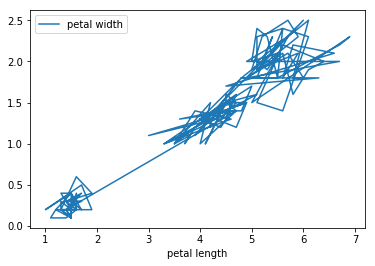

In [19]:
irisData.dropna().plot(x='petal length', y='petal width')

> *ANSWER:* `petal length` and `petal width` seem to correlate in three clusters, supposedly corresponding to three types of irises, using mean over all training examples causes the replaced values not follow this correlation and become noise in the dataset

That is, the values for the `iris-setosa` example should be the mean of only other `iris-setosa` examples, and likewise for the `iris-virginica` and `iris-versicolor` examples.

This is your exercise. To do this, you will need to:

- **Separate the rows according to the iris flower type**

In [20]:
irisAttrs.isna().sum()

sepal length    0
sepal width     0
petal length    2
petal width     2
dtype: int64

In [21]:
setosa = irisAttrs[irisData['iris'] == 'Iris-setosa']
virginica = irisAttrs[irisData['iris'] == 'Iris-virginica']
versicolor = irisAttrs[irisData['iris'] == 'Iris-versicolor']

print('Setosa:', setosa.shape)
print('Virginica:', virginica.shape)
print('Versicolor:', versicolor.shape)

Setosa: (51, 4)
Virginica: (51, 4)
Versicolor: (50, 4)


- **Impute the missing values for each set**

In [22]:
im_median = SimpleImputer(strategy='median')

setosa = im_median.fit_transform(setosa)
virginica = im_median.fit_transform(virginica)
versicolor = im_median.fit_transform(versicolor)

- **Recombine the three parts into a single data table**

For the last step you will need to note that after imputing the resulting data structure is a numpy, not a data frame. Thus the method for combining the training examples will need to be changed. Numpy has a concatenation method that works almost identically to the pandas method:

In [23]:
irisImputed = np.concatenate([setosa, virginica, versicolor], axis=0)
irisImputed.shape

(152, 4)

The axis value works the same as for the pandas method. Finally, **build a decision tree using this preprocessed set of data.**

In [24]:
buildDt(irisImputed, dataTarget)

Val accuracy: 0.8064516129032258


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**QUESTION: Is this tree different or better than any that you have build in the rest of this lab? In general, what are good strategies for handing training examples with missing attributes?**

> *ANSWER:* 
- Median imputed tree achieved lower accuracy than mean imputed tree above
- In general, if the number of examples with missing values is insignificant, removing them could be a safe solution. Otherwise, missing values can be replaced with certain values using domain knowledge about the problem, statistical imputation, or in some cases linear regression.